# Global Suicide Statistics - EDA

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("arpitsinghaiml/global-suicide-statistics")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/arpitsinghaiml/global-suicide-statistics/versions/1


In [2]:
!ls /root/.cache/kagglehub/datasets/arpitsinghaiml/global-suicide-statistics/versions/1

suicide-rate-by-country-2024.csv


## Import dependencies

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv(path + '/suicide-rate-by-country-2024.csv')

In [5]:
df.head()

,country,SuicideRate_BothSexes_RatePer100k_2021,SuicideRate_Male_RatePer100k_2021,SuicideRate_Female_RatePer100k_2021,SuicideRate_BothSexes_RatePer100k_2020,SuicideRate_Male_RatePer100k_2020,SuicideRate_Female_RatePer100k_2020,SuicideRate_BothSexes_RatePer100k_2019,SuicideRate_Male_RatePer100k_2019,SuicideRate_Female_RatePer100k_2019
0,India,13.33,15.70,10.85,13.28,15.70,10.73,12.7,14.1,11.1
1,China,9.17,10.64,7.63,9.04,10.52,7.50,8.1,9.8,6.2
2,United States,15.25,24.13,6.66,15.38,24.33,6.73,16.1,25.0,7.5
3,Indonesia,1.64,2.21,1.05,1.66,2.23,1.07,2.4,3.7,1.1
4,Pakistan,5.82,8.46,3.05,5.89,8.54,3.10,8.9,13.3,4.3


## Rearrange Dataset

In [6]:
# Melt the dataframe to have a year and gender column
melted_df = pd.melt(df, id_vars=['country'], 
                    value_vars=['SuicideRate_BothSexes_RatePer100k_2021', 
                                'SuicideRate_Male_RatePer100k_2021', 
                                'SuicideRate_Female_RatePer100k_2021', 
                                'SuicideRate_BothSexes_RatePer100k_2020', 
                                'SuicideRate_Male_RatePer100k_2020', 
                                'SuicideRate_Female_RatePer100k_2020', 
                                'SuicideRate_BothSexes_RatePer100k_2019', 
                                'SuicideRate_Male_RatePer100k_2019', 
                                'SuicideRate_Female_RatePer100k_2019'],
                    var_name='Year_Gender', value_name='RatePer100k')

# Extract year and gender from the 'Year_Gender' column
melted_df['Year'] = melted_df['Year_Gender'].str.extract(r'(\d{4})')
melted_df['Gender'] = melted_df['Year_Gender'].str.extract(r'_(BothSexes|Male|Female)_')

# Drop the 'Year_Gender' column as it's no longer needed
melted_df = melted_df.drop(columns=['Year_Gender'])

melted_df.head()

            country  RatePer100k  Year     Gender
0             India        13.33  2021  BothSexes
1             China         9.17  2021  BothSexes
2     United States        15.25  2021  BothSexes
3         Indonesia         1.64  2021  BothSexes
4          Pakistan         5.82  2021  BothSexes
...             ...          ...   ...        ...
1831   Cook Islands          NaN  2019     Female
1832          Nauru          NaN  2019     Female
1833         Tuvalu          NaN  2019     Female
1834        Tokelau          NaN  2019     Female
1835           Niue          NaN  2019     Female

[1836 rows x 4 columns]


In [7]:
nan_counts = melted_df.isna().sum()
print(nan_counts)

country         0
RatePer100k    64
Year            0
Gender          0
dtype: int64


## Top 10 Countries with Highest Suicide Rates (Both Sexes)

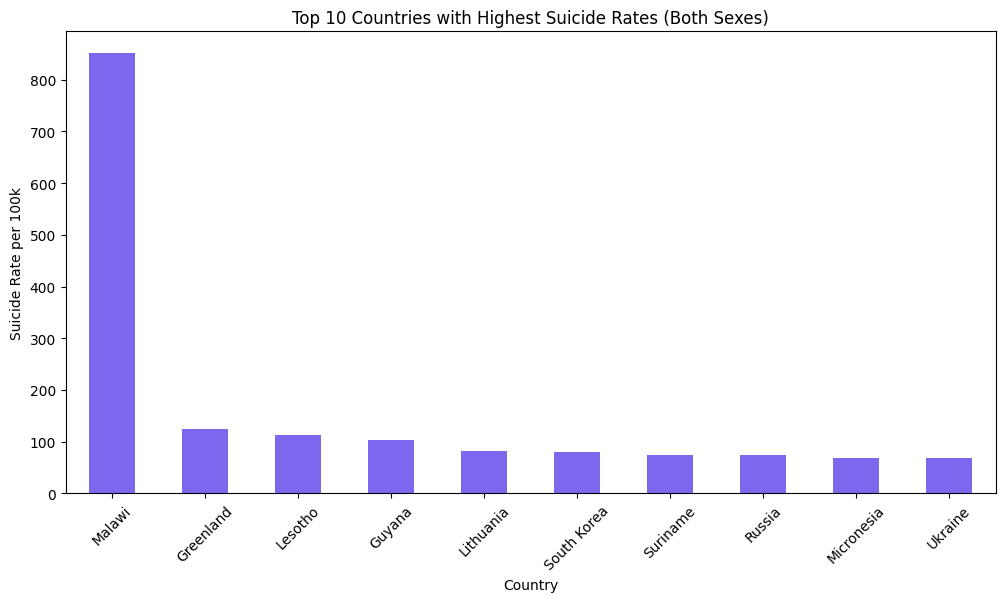

In [10]:
# Filter the data for BothSexes
both_sexes_df = melted_df[melted_df['Gender'] == 'BothSexes']

# Group by country and sum the rates
country_suicide_rates = both_sexes_df.groupby('country')['RatePer100k'].sum().sort_values(ascending=False)

# Plot the top 10 countries with the highest suicide rates
top_10_countries = country_suicide_rates.head(10)
top_10_countries.plot(kind='bar', figsize=(12, 6), color='mediumslateblue')
plt.title('Top 10 Countries with Highest Suicide Rates (Both Sexes)')
plt.xlabel('Country')
plt.ylabel('Suicide Rate per 100k')
plt.xticks(rotation=45)
plt.show()

## Top 10 Countries with Highest Suicide Rates (Female)

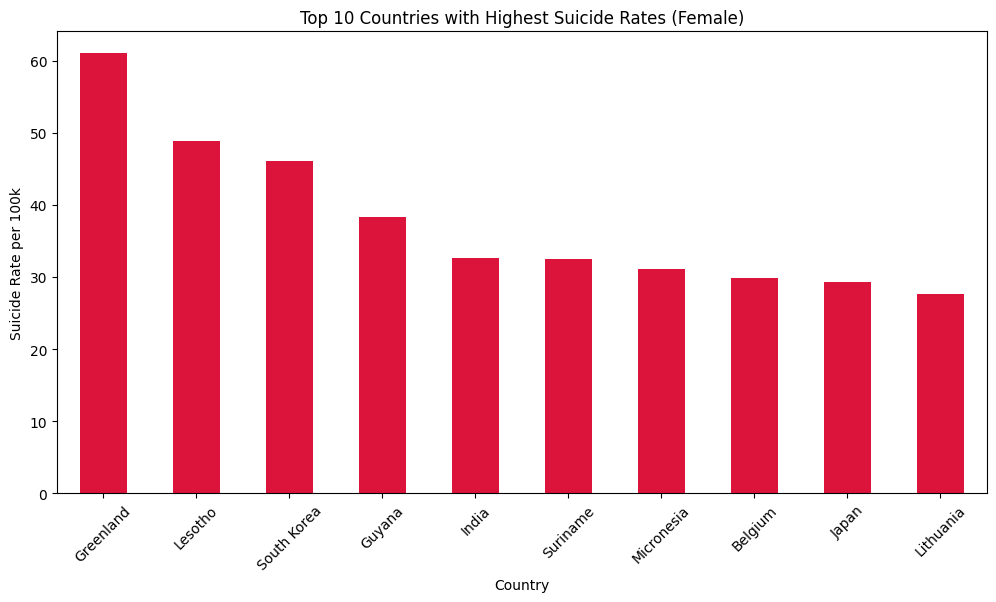

In [13]:

# Filter the data for BothSexes
Female_df = melted_df[melted_df['Gender'] == 'Female']

# Group by country and sum the rates
country_female_suicide_rates = Female_df.groupby('country')['RatePer100k'].sum().sort_values(ascending=False)

# Plot the top 10 countries with the highest suicide rates
top_10_countries_female = country_female_suicide_rates.head(10)
top_10_countries_female.plot(kind='bar', figsize=(12, 6), color='crimson')
plt.title('Top 10 Countries with Highest Suicide Rates (Female)')
plt.xlabel('Country')
plt.ylabel('Suicide Rate per 100k')
plt.xticks(rotation=45)
plt.show()

## Top 10 Countries with Highest Suicide Rates (Male)

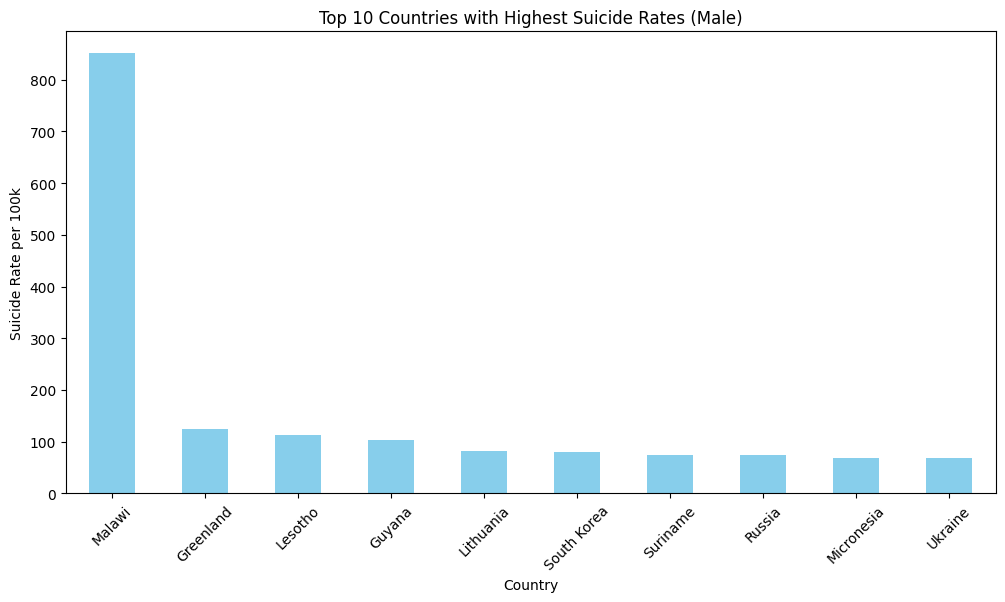

In [11]:

# Filter the data for BothSexes
male_df = melted_df[melted_df['Gender'] == 'Male']

# Group by country and sum the rates
country_male_suicide_rates = male_df.groupby('country')['RatePer100k'].sum().sort_values(ascending=False)

# Plot the top 10 countries with the highest suicide rates
top_10_countries_male = country_suicide_rates.head(10)
top_10_countries_male.plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title('Top 10 Countries with Highest Suicide Rates (Male)')
plt.xlabel('Country')
plt.ylabel('Suicide Rate per 100k')
plt.xticks(rotation=45)
plt.show()

## Histogram of Suicide Rates by Year for Top 10 Countries

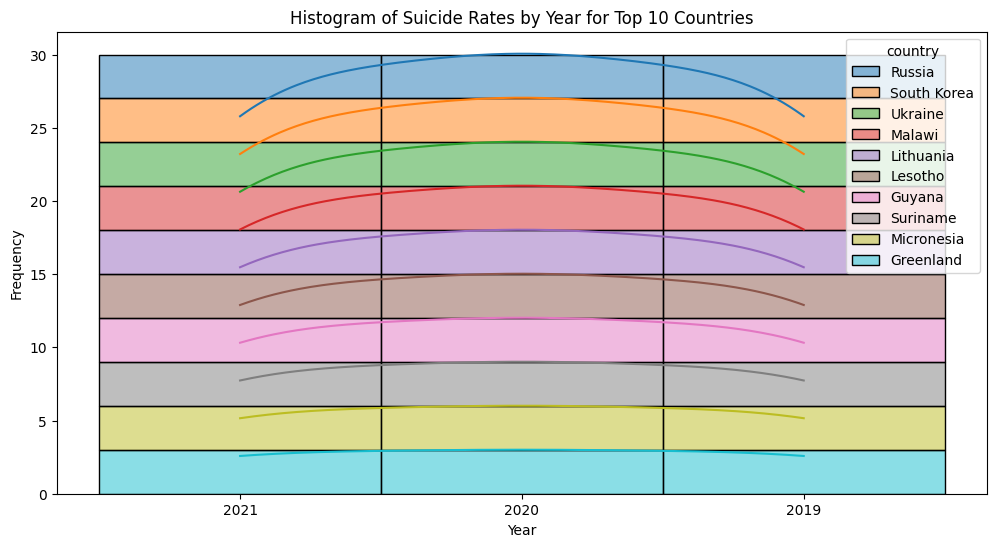

In [20]:
# Filter the top 10 countries with the highest suicide rates
top_10_countries_list = top_10_countries.index.tolist()
top_10_df = melted_df[melted_df['country'].isin(top_10_countries_list)]

# Plot histogram of suicide rates by year for the top 10 countries
plt.figure(figsize=(12, 6))
sns.histplot(data=top_10_df, x='Year', hue='country', multiple='stack', kde=True)
plt.title('Histogram of Suicide Rates by Year for Top 10 Countries')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

## Suicide Rates by Gender in Top 10 Countries

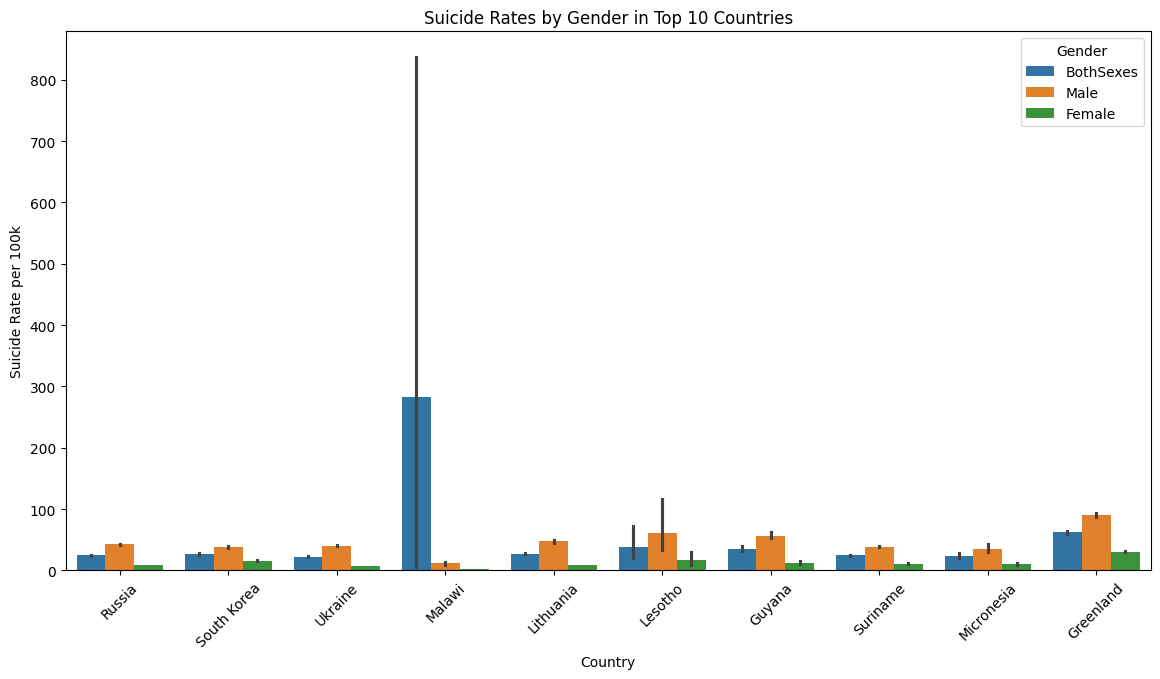

In [21]:
# Filter the data for the top 10 countries
top_10_countries_list = top_10_countries.index.tolist()
top_10_df = melted_df[melted_df['country'].isin(top_10_countries_list)]

# Create a grouped barplot
plt.figure(figsize=(14, 7))
sns.barplot(data=top_10_df, x='country', y='RatePer100k', hue='Gender')
plt.title('Suicide Rates by Gender in Top 10 Countries')
plt.xlabel('Country')
plt.ylabel('Suicide Rate per 100k')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

## Top 10 Countries with Highest Suicide Rates in 2019 (Both Sexes)

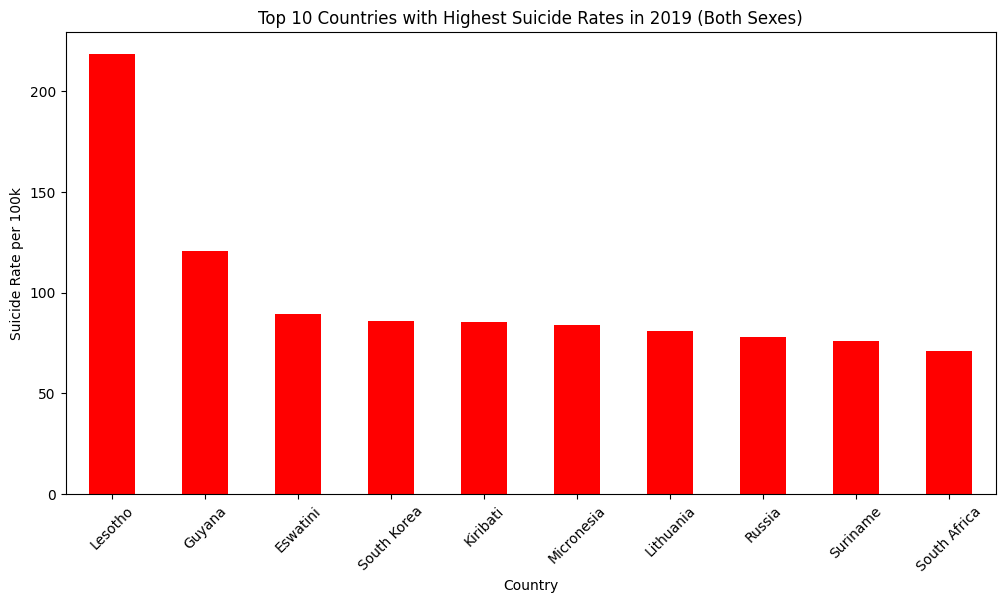

In [28]:
# Filter the data for the year 2019
year_2019_df = melted_df[melted_df['Year'] == '2019']

# Group by country and sum the rates
year_2019_country_suicide_rates = year_2019_df.groupby('country')['RatePer100k'].sum().sort_values(ascending=False)

# Plot the top 10 countries with the highest suicide rates for 2019
top_10_2019 = year_2019_country_suicide_rates.head(10)
top_10_2019.plot(kind='bar', figsize=(12, 6), color='red')
plt.title('Top 10 Countries with Highest Suicide Rates in 2019 (Both Sexes)')
plt.xlabel('Country')
plt.ylabel('Suicide Rate per 100k')
plt.xticks(rotation=45)
plt.show()

## Top 10 Countries with Highest Suicide Rates in 2021 (Both Sexes)

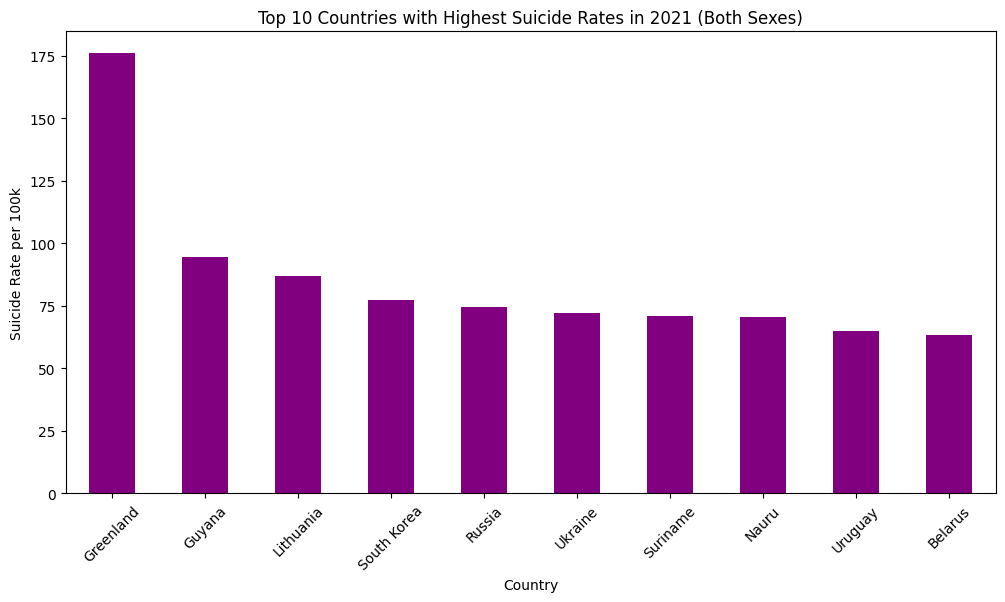

In [26]:
# Filter the data for the last year available
last_year = melted_df['Year'].max()
last_year_df = melted_df[melted_df['Year'] == last_year]

# Group by country and sum the rates
last_year_country_suicide_rates = last_year_df.groupby('country')['RatePer100k'].sum().sort_values(ascending=False)

# Plot the top 10 countries with the highest suicide rates for the last year
top_10_last_year = last_year_country_suicide_rates.head(10)
top_10_last_year.plot(kind='bar', figsize=(12, 6), color='purple')
plt.title(f'Top 10 Countries with Highest Suicide Rates in {last_year} (Both Sexes)')
plt.xlabel('Country')
plt.ylabel('Suicide Rate per 100k')
plt.xticks(rotation=45)
plt.show()

## Top 10 Countries with Highest Suicide Rates in 2021 (Male)

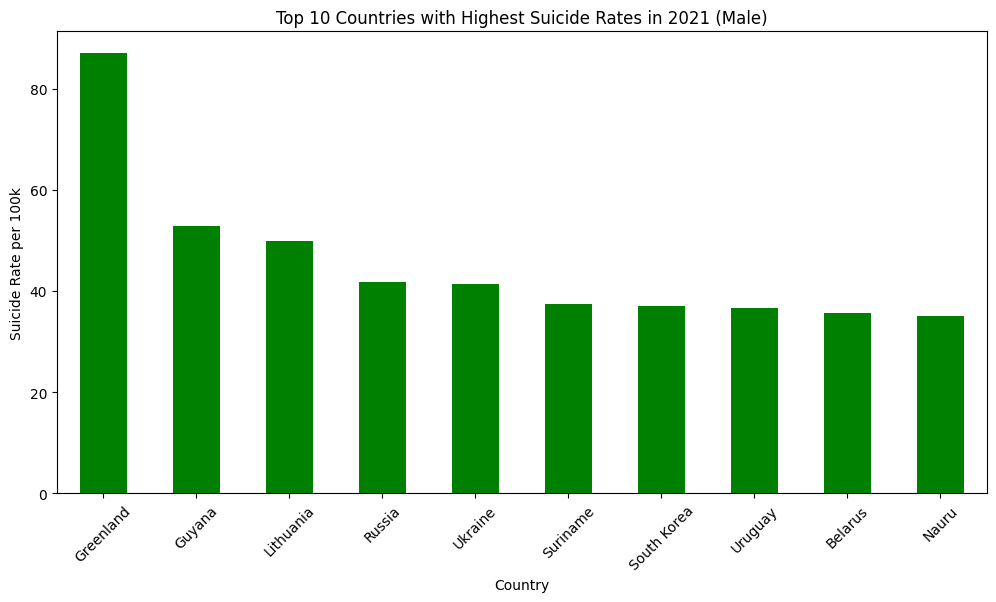

In [32]:
# Filter the data for the last year available
last_year = melted_df['Year'].max()
last_year_df = melted_df[(melted_df['Year'] == last_year) & (last_year_df['Gender'] == 'Male')]

# Group by country and sum the rates
last_year_country_suicide_rates = last_year_df.groupby('country')['RatePer100k'].sum().sort_values(ascending=False)

# Plot the top 10 countries with the highest suicide rates for the last year
top_10_last_year = last_year_country_suicide_rates.head(10)
top_10_last_year.plot(kind='bar', figsize=(12, 6), color='green')
plt.title(f'Top 10 Countries with Highest Suicide Rates in {last_year} (Male)')
plt.xlabel('Country')
plt.ylabel('Suicide Rate per 100k')
plt.xticks(rotation=45)
plt.show()

## Top 10 Countries with Highest Suicide Rates in 2021 (Female)

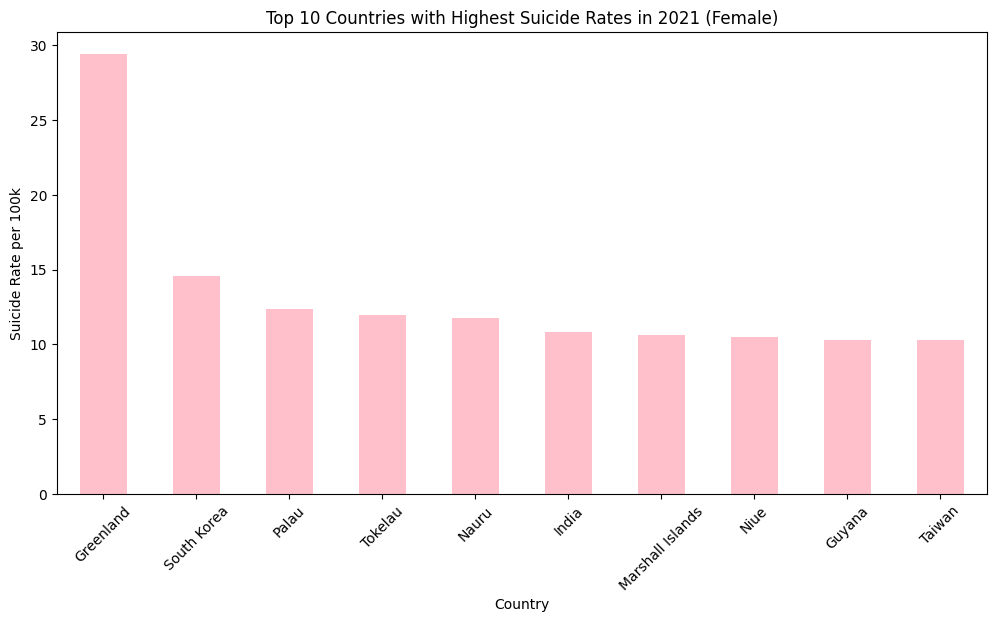

In [36]:


# Filter the data for the last year available
last_year = melted_df['Year'].max()
last_year_df = melted_df[(melted_df['Year'] == last_year) & (melted_df['Gender'] == 'Female')]

# Group by country and sum the rates
last_year_country_suicide_rates = last_year_df.groupby('country')['RatePer100k'].sum().sort_values(ascending=False)

# Plot the top 10 countries with the highest suicide rates for the last year
top_10_last_year = last_year_country_suicide_rates.head(10)
top_10_last_year.plot(kind='bar', figsize=(12, 6), color='pink')
plt.title(f'Top 10 Countries with Highest Suicide Rates in {last_year} (Female)')
plt.xlabel('Country')
plt.ylabel('Suicide Rate per 100k')
plt.xticks(rotation=45)
plt.show()

## Countries with Least Suicides in 2021 by Gender

/tmp/ipykernel_2742/1844854127.py:15: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:yellow'` for the same effect.

  sns.barplot(data=least_suicides_2021_df, x='country', y='RatePer100k', hue='Gender', color='yellow')


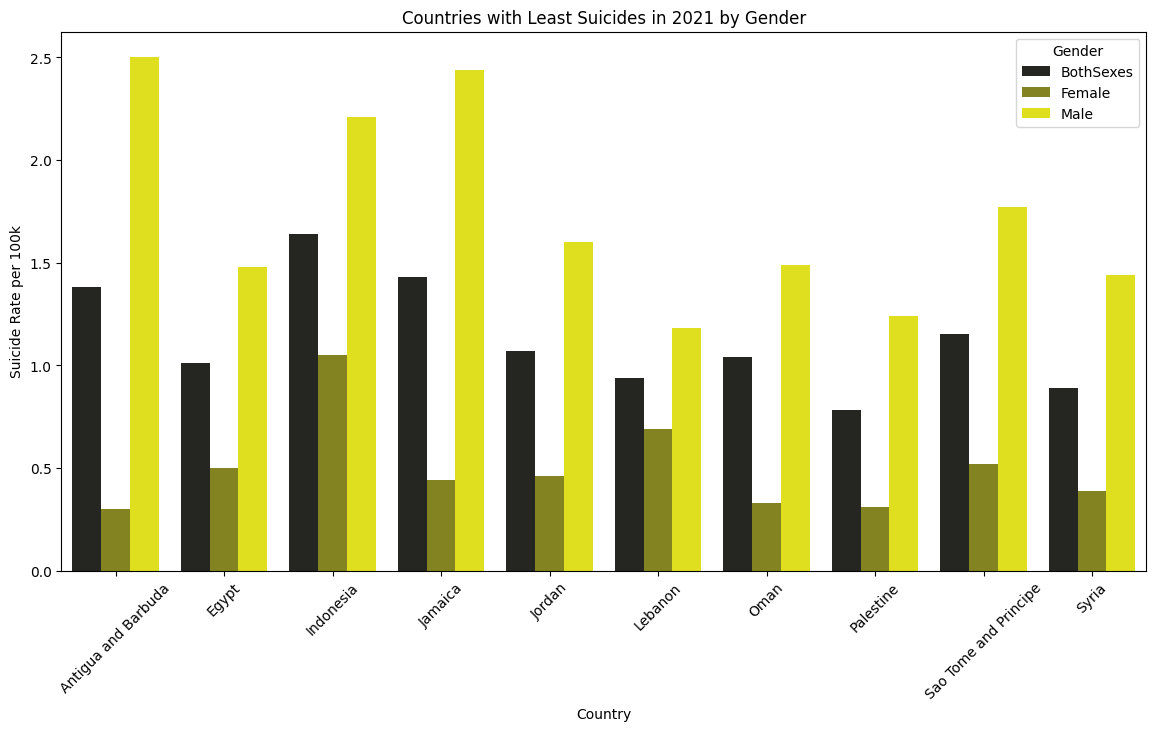

In [19]:
# Filter the data for the year 2021
year_2021_df = melted_df[melted_df['Year'] == '2021']

# Group by country and gender, and sum the rates
year_2021_country_gender_suicide_rates = year_2021_df.groupby(['country', 'Gender'])['RatePer100k'].sum().reset_index()

# Sort the data to get the countries with the least suicides
least_suicides_2021 = year_2021_country_gender_suicide_rates.groupby('country')['RatePer100k'].sum().sort_values().head(10).index.tolist()

# Filter the data for the least suicides countries
least_suicides_2021_df = year_2021_country_gender_suicide_rates[year_2021_country_gender_suicide_rates['country'].isin(least_suicides_2021)]

# Plot the data
plt.figure(figsize=(14, 7))
sns.barplot(data=least_suicides_2021_df, x='country', y='RatePer100k', hue='Gender', color='yellow')
plt.title('Countries with Least Suicides in 2021 by Gender')
plt.xlabel('Country')
plt.ylabel('Suicide Rate per 100k')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

## Countries with Least Suicides in 2019 by Gender

/tmp/ipykernel_2742/1844096566.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_2019_df.dropna(inplace=True)
/tmp/ipykernel_2742/1844096566.py:17: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:blue'` for the same effect.

  sns.barplot(data=least_suicides_2019_df, x='country', y='RatePer100k', hue='Gender',color='blue')


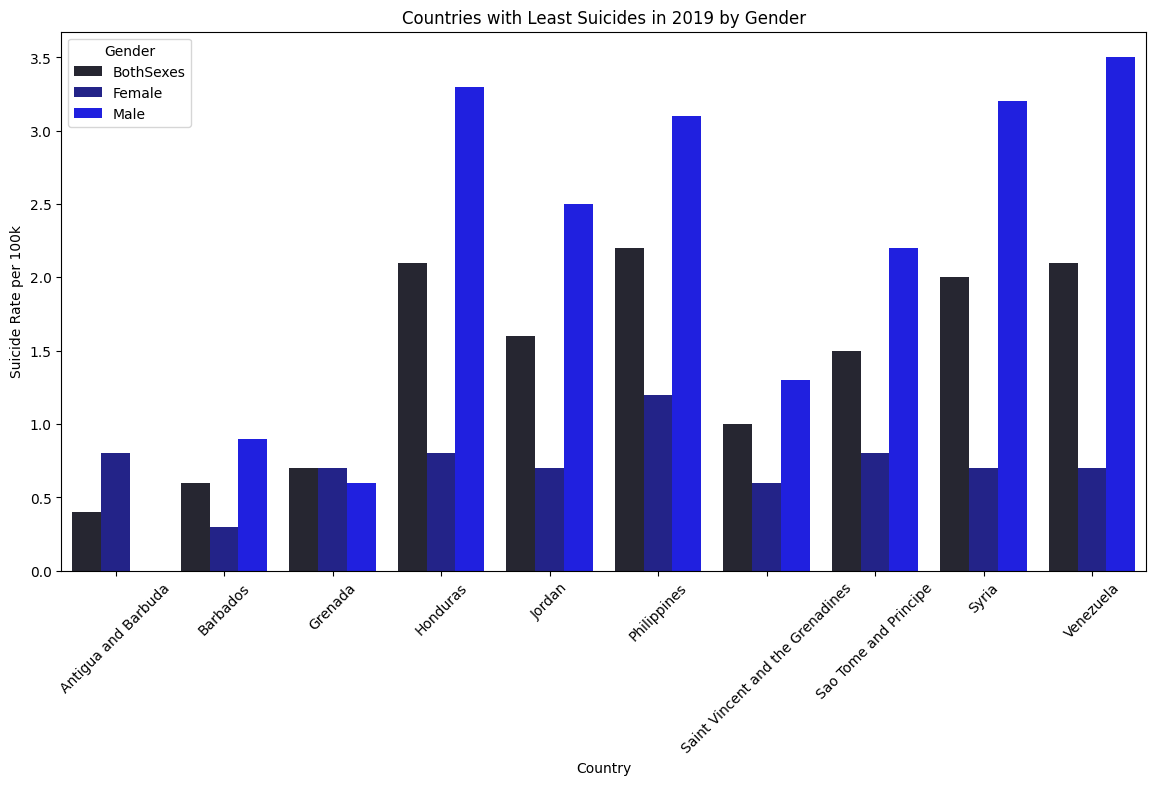

In [18]:


# Filter the data for the year 2019
year_2019_df = melted_df[melted_df['Year'] == '2019']

year_2019_df.dropna(inplace=True)

# Group by country and gender, and sum the rates
year_2019_country_gender_suicide_rates = year_2019_df.groupby(['country', 'Gender'])['RatePer100k'].sum().reset_index()

# Sort the data to get the countries with the least suicides
least_suicides_2019 = year_2019_country_gender_suicide_rates.groupby('country')['RatePer100k'].sum().sort_values().head(10).index.tolist()

# Filter the data for the least suicides countries
least_suicides_2019_df = year_2019_country_gender_suicide_rates[year_2019_country_gender_suicide_rates['country'].isin(least_suicides_2019)]

# Plot the data
plt.figure(figsize=(14, 7))
sns.barplot(data=least_suicides_2019_df, x='country', y='RatePer100k', hue='Gender',color='blue')
plt.title('Countries with Least Suicides in 2019 by Gender')
plt.xlabel('Country')
plt.ylabel('Suicide Rate per 100k')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()